In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer,Binarizer, Imputer, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, make_union, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
%matplotlib inline

In [28]:
df = pd.read_csv('dffinal.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('Response', axis = 1, inplace = True)
df.drop('Type', axis = 1, inplace = True)

In [22]:
df.dtypes

Actors         object
Awards         object
Country        object
Director       object
Genre          object
Language       object
Metascore     float64
Plot           object
Poster         object
Rated          object
Released       object
Runtime        object
Title          object
Writer         object
Year            int64
imdbID         object
imdbRating    float64
imdbVotes      object
top250          int64
dtype: object

In [284]:
pd.set_option("display.max_columns", 35)
pd.set_option("display.max_rows", 501)

In [23]:
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Runtime,Title,Writer,Year,imdbID,imdbRating,imdbVotes,top250
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,142 min,The Shawshank Redemption,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,786,262",1
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,175 min,The Godfather,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,219,320",1


Actors
--
This appears to be the first four names in the Cast section. Maybe we can make dummy variables if 'x' actor/actress was in the movie.

In [24]:
df['Actors'][5]

'Liam Neeson, Ben Kingsley, Ralph Fiennes, Caroline Goodall'

Awards
--
We can create columns for Oscar wins, other wins, and nominations

In [29]:
df['Awards'].fillna('0 wins', inplace = True)

In [209]:
df['Awards'][116].split('Won')[1]#.split('Oscar')[0].strip()

' 1 Oscar. Another 9 wins & 13 nominations.'

In [30]:
def oscars(series):
    split = series.split('Won')
    if len(split) < 2:
        return 0
    else:
        if 'Oscar' not in split[1]:
            return 0
        else:
            return split[1].split('Oscar')[0].strip()

In [31]:
df['OscarsWin'] = df['Awards'].apply(oscars)

In [211]:
df['OscarsWin'].value_counts()

0     377
1      42
2      23
4      18
3      15
5       9
6       5
7       5
8       4
11      2
Name: OscarsWin, dtype: int64

In [171]:
df['Awards'][309]

'Nominated for 1 BAFTA Film Award. Another 2 wins & 1 nomination.'

In [212]:
df['Awards'][1].split('Another')[1].split()[0]

'23'

In [213]:
df['Awards'][0].split('&')[1].split('nominations')[0].strip()

'30'

In [32]:
def nominations(series):
    nom = 0
    split = series.split('for')
    if len(split) > 1:
        nom += int(split[1].split()[0])
    else:
        nom += 0
    newsplit = series.split('&')
    if len(newsplit) > 1:
        nom += int(newsplit[1].split()[0])
    else:
        nom += 0
    return nom

In [33]:
df['Nominations'] = df['Awards'].apply(nominations)

In [34]:
def otherwins(series):
    split = series.split('Another')
    if len(split) > 1:
        return split[1].split()[0]
    else:
        return 0

In [175]:
df['Awards'][8]

'1 win & 2 nominations.'

In [35]:
df['OtherWins'] = df['Awards'].apply(otherwins)

Country
--
Since most movies come from USA, we will just make a dummy variable to classify if movies are from USA.

In [36]:
df['USA'] = df['Country'].apply(lambda x: 1 if 'USA' in x else 0)

Director
--
We can try to create dummy variables for directors who have appeared in the top 250 list for a certain number of times

In [193]:
df.loc[df['top250'] == 1, 'Director'].value_counts().head(9)
#cutoff at 5?

Stanley Kubrick      7
Christopher Nolan    7
Alfred Hitchcock     7
Martin Scorsese      7
Steven Spielberg     7
Hayao Miyazaki       5
Akira Kurosawa       5
Charles Chaplin      5
Billy Wilder         5
Name: Director, dtype: int64

Genre
--
We can create dummy columns of genres

In [194]:
df['Genre'].value_counts()

Drama                            29
Comedy, Drama, Romance           17
Comedy                           16
Crime, Drama                     16
Crime, Drama, Mystery            14
Comedy, Drama                    13
Comedy, Romance                  12
Animation, Adventure, Comedy     11
Biography, Drama, History        11
Crime, Drama, Thriller           11
Horror                           11
Drama, War                        9
Action, Adventure, Fantasy        8
Drama, Romance                    8
Action, Comedy, Crime             7
Biography, Crime, Drama           7
Action, Crime, Drama              6
Action, Adventure, Drama          6
Action, Adventure, Sci-Fi         6
Action, Crime, Thriller           6
Drama, Mystery, Thriller          5
Drama, Thriller                   5
Comedy, Crime, Drama              5
Adventure, Drama, Fantasy         5
Action, Adventure, Comedy         5
Adventure, Family, Fantasy        4
Crime, Drama, Romance             4
Western                     

Language
--
We can create dummy variables of language

In [195]:
df['Language'].value_counts()

English                                                                  265
English, Spanish                                                          23
English, French                                                           19
Japanese                                                                  11
Hindi                                                                      9
Italian                                                                    7
English, Russian                                                           6
English, German                                                            6
Spanish                                                                    5
French                                                                     4
German                                                                     3
French, English                                                            3
English, Italian                                                           3

Metascore
--
We can fill NaNs with the mean

In [199]:
df['Metascore'].describe()

count    346.000000
mean      64.973988
std       21.057187
min       15.000000
25%       50.250000
50%       68.000000
75%       82.000000
max      100.000000
Name: Metascore, dtype: float64

In [37]:
df['Metascore'].fillna(df['Metascore'].mean(), inplace = True)

Plot
--
We can attempt to find keywords

Poster
--
TBD

Rated
--
We can create dummy variables. Since R is clear majority, we will just create one dummy. 

In [203]:
df['Rated'].value_counts()

R            213
PG-13        102
PG            72
NOT RATED     40
APPROVED      21
G             18
UNRATED       12
PASSED         3
TV-PG          1
NC-17          1
TV-14          1
Name: Rated, dtype: int64

In [38]:
df['IsR'] = df['Rated'].apply(lambda x: 1 if x == 'R' else 0)

Released
--
We convert values to datetime

In [225]:
df.loc[df['Released'].isnull(), 'Title']

131                       Andrei Rublev
135                       The Gold Rush
248    What Ever Happened to Baby Jane?
411                         3 Backyards
437                        Pledge This!
Name: Title, dtype: object

There are some missing dates, and for convenience purposes, we will manually fill the 5 missing dates so we can convert everything to a datetime object

In [39]:
df.loc[df['Title'] == 'Andrei Rublev', 'Released'] = '1 Apr 1973'

In [40]:
df.loc[df['Title'] == 'The Gold Rush', 'Released'] = '26 Jun 1925'

In [41]:
df.loc[df['Title'] == 'What Ever Happened to Baby Jane?', 'Released'] = '31 Oct 1962'

In [42]:
df.loc[df['Title'] == '3 Backyards', 'Released'] = '24 Jan 2010'

In [43]:
df.loc[df['Title'] == 'Pledge This!', 'Released'] = '19 Dec 2006'

In [44]:
df['ReleasedDate'] = df['Released'].apply(lambda x: datetime.strptime(x, '%d %b %Y'))

Now we can decide whether to create dummy variables of the month of release, or we can convert the dates to an integer value indicating days since 'x'.

In [45]:
df['ReleaseOrdinal'] = df['ReleasedDate'].apply(lambda x: x.toordinal())

Above was since January 1 of Year 1, now we apply it so we can the difference between a value and the minimum date, divided by the range of all dates

In [46]:
((df['ReleasedDate'][0] - df['ReleasedDate'].min())/np.timedelta64(1, 'D')).astype(float)

26913.0

In [47]:
df['ReleaseDaysDiff'] = df['ReleasedDate'].apply(lambda x: ((x - df['ReleasedDate'].min())/np.timedelta64(1,'D')).astype(float)/((df['ReleasedDate'].max() - df['ReleasedDate'].min())/np.timedelta64(1,'D')).astype(int))

Now we have a column that gets the difference between the release date and the earliest release date, and divides the result by the range of release dates. The larger the value gets, the later the film was released.

In [50]:
df['ReleasedDate'].min()

Timestamp('1921-02-06 00:00:00')

In [51]:
df['ReleasedDate'].max()

Timestamp('2017-03-03 00:00:00')

Runtime 
--
We just replace the 'min' string and convert to integer.

In [48]:
df['Runtime'] = df['Runtime'].apply(lambda x: int(x.replace(' min','')))

In [270]:
df['Runtime'].describe()

count    500.000000
mean     117.870000
std       29.233445
min       66.000000
25%       97.000000
50%      110.000000
75%      131.000000
max      320.000000
Name: Runtime, dtype: float64

Title
--
We can try to find key words

Writer
--
We can try to make dummy variables

Year
--
We already have a similar feature with ReleasedDate

imdbID
--
Movie identifier

imdbRating
--

In [274]:
df['imdbRating'].describe()

count    500.000000
mean       7.239600
std        1.409754
min        1.600000
25%        6.400000
50%        8.000000
75%        8.300000
max        9.300000
Name: imdbRating, dtype: float64

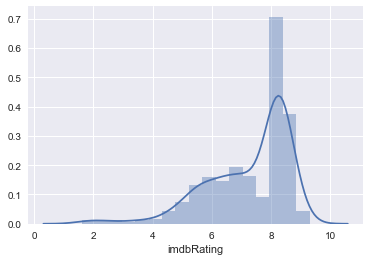

In [275]:
sns.distplot(df['imdbRating'])

Most movies have a pretty high imdbRating around 8

imdbVotes
--

In [49]:
df['imdbVotes'] = df['imdbVotes'].apply(lambda x: int(x.replace(',','')))

In [279]:
df['imdbVotes'].describe()

count    5.000000e+02
mean     2.382183e+05
std      3.120997e+05
min      2.100000e+01
25%      2.829825e+04
50%      9.644900e+04
75%      3.350362e+05
max      1.786262e+06
Name: imdbVotes, dtype: float64

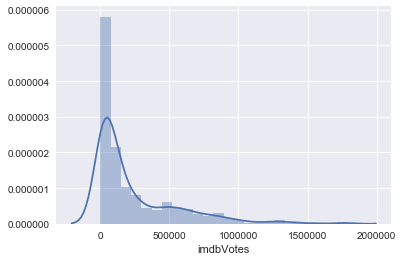

In [280]:
sns.distplot(df['imdbVotes'])

We can see that the number of votes isn't too high, although the number of votes required to make the top 250 list is only 25,000.

top250
--

In [281]:
df['top250'].value_counts()

1    250
0    250
Name: top250, dtype: int64

In [285]:
df.head(1)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Runtime,Title,Writer,Year,imdbID,imdbRating,imdbVotes,top250,OscarsWin,Nominations,OtherWins,USA,IsR,ReleasedDate,ReleaseOrdinal,ReleaseDaysDiff
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,142,The Shawshank Redemption,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,1786262,1,0,37,19,1,1,1994-10-14,728215,0.766993


In [25]:
modeldf = df[['Metascore','Runtime','imdbRating','imdbVotes','OscarsWin','Nominations',
             'OtherWins','USA','IsR','ReleaseOrdinal','ReleaseDaysDiff','top250']]

modeldf.to_csv('modeldf.csv', encoding = 'utf-8')

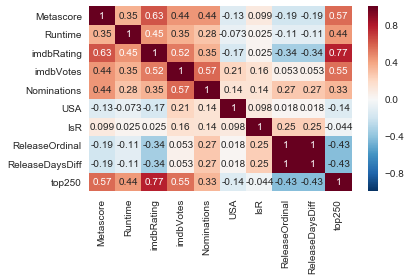

In [52]:
sns.heatmap(modeldf.corr(), annot = True)
plt.tight_layout()
plt.savefig('corrmap.png')